# Import

In [1]:
import pandas as pd
import os
import numpy as np

import re
# import json
import matplotlib.pyplot as plt

import random
import shutil

In [2]:
df_data = pd.read_json("/348.json" , lines = True)

In [3]:
# Second json with data
df_data2 = pd.read_json("/core_all_cyr.jsonl" , lines = True)

In [4]:
df_full = df_data.append(pd.DataFrame(data = df_data2), ignore_index=True)
df_full = df_full.drop_duplicates(subset=["coreId"],keep = "first")

In [6]:
# get the final PDF Core_ids
files = os.listdir("/PDFs_15553")
# f in files re.sub("Core_ID_","",files)
core_ids= [int(re.sub(".pdf","",re.sub("Core_ID_","",f))) for f in files]
core_ids

[11083759,
 11083794,
 11083801,
 11083807,
 11083814,
 11083816,
 11083818,
 11083820,
 11083841,
 11083843,
 11084183,
 11084185,
 11084196,
 11084226,
 11084228,
 11084232,
 11084286,
 11084289,
 11084295,
 11084334,
 11084432,
 11084498,
 11084525,
 11084527,
 11084531,
 11084535,
 11084639,
 11084670,
 11084672,
 11084674,
 11084676,
 11084682,
 11084739,
 11084741,
 11311954,
 11311956,
 11311957,
 11312082,
 11312083,
 11312155,
 11312159,
 11312161,
 11312162,
 11312164,
 11312165,
 11312167,
 11312168,
 11312169,
 11312171,
 11312173,
 11312174,
 11312176,
 11312178,
 11312180,
 11312182,
 11312184,
 11312185,
 11312186,
 11312188,
 11312189,
 11312192,
 11312193,
 11312194,
 11312195,
 11312196,
 11312198,
 11312199,
 11312201,
 11312202,
 11312205,
 11312207,
 11312209,
 11312211,
 11312212,
 11312214,
 11312215,
 11312220,
 11312221,
 11312222,
 11312223,
 11312225,
 11312226,
 11312227,
 11312228,
 11312229,
 11312230,
 11312231,
 11312232,
 11312234,
 11312235,
 11312236,

In [7]:
df_full = df_full[df_full.coreId.isin(core_ids)]

In [8]:
df_full.reset_index(drop = True , inplace= True)

In [9]:
df_full.shape

(15550, 22)

In [10]:
df_full.head()

,doi,coreId,oai,identifiers,title,authors,enrichments,contributors,datePublished,abstract,...,pdfHashValue,publisher,rawRecordXml,journals,language,relations,year,topics,subjects,fullText
0,None,145231748,oai:eprints.kname.edu.ua:47230,[],Еволюція розвитку підземної урбаністики,"[Апатенко, Т.М., Шередько, А.О.]","{'references': [], 'documentType': {'type': 'r...",[],2017-11,None,...,None,None,<record><header><identifier>\n \n \n ...,[],None,[http://eprints.kname.edu.ua/47230/],2017.0,[Устойчивое развитие городов (градостроительны...,"[Доклад на конференции или семинаре, NonPeerRe...",\n13 \nпорядку спочатку необхідно вдосконалит...
1,None,145231731,oai:eprints.kname.edu.ua:47210,[],Використання природних мінеральних сорбентів д...,"[Шевцов, О.С.]","{'references': [], 'documentType': {'type': 'r...",[],2017-04,None,...,None,None,<record><header><identifier>\n \n \n ...,[],None,[http://eprints.kname.edu.ua/47210/],2017.0,[Устойчивое развитие городов (2017)],"[Доклад на конференции или семинаре, NonPeerRe...",195 \nтехнологічних схем очищення ПСВ конкрет...
2,None,33754009,oai:eprints.kname.edu.ua:36108,[],Анализ причин газовыделения в силовых трансфор...,"[Шутенко, О.В., Баклай, Д.Н., Острикова, Т.А.,...","{'references': [], 'documentType': {'type': 'r...",[],2012,None,...,None,Харк. нац. ун-т міськ. госп-ва ім. О. М. Бекетова,<record><header><identifier>\n \n \n ...,[],None,[http://eprints.kname.edu.ua/36108/],2012.0,[№ 3 (2012): №31],"[Статья, PeerReviewed]",ЕЛЕКТРОЕНЕРГЕТИКА \n3’2012 СВІТЛОТЕХНІКА Т...
3,None,33754100,oai:eprints.kname.edu.ua:36222,[],Учет процессов «закачки» энергии при выборе ин...,"[Жемеров , Г.Г., Ильина, Н.А., Тугай, Д.В.]","{'references': [], 'documentType': {'type': 'r...",[],2012,Целью настоящей статьи является по-лучение рас...,...,None,Київ,<record><header><identifier>\n \n \n ...,[],None,[http://eprints.kname.edu.ua/36222/],2012.0,[Публикации в других изданиях],"[Статья, NonPeerReviewed]",УЧЕТ ПРОЦЕССОВ «ЗАКАЧКИ» ЭНЕРГИИ ПРИ ВЫБОРЕ ИН...
4,None,33754085,oai:eprints.kname.edu.ua:36199,[],ОСОБЕННОСТИ ТИПОЛОГИЙ ЖИЛЫХ ЗДАНИЙ ГОРОДОВ\ud\...,"[Семенов, В.Т., Лагутина, В.А.]","{'references': [], 'documentType': {'type': 'u...",[],2013-12-30,None,...,None,Харківський національний університет міського ...,<record><header><identifier>\n \n \n ...,[],None,[http://eprints.kname.edu.ua/36199/],2013.0,[Выпуск 112. Серия: Технические науки и архите...,"[Статья, PeerReviewed]",Комунальне господарство міст \n \n \n177\nУДК ...


In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15550 entries, 0 to 15549
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   doi                 1 non-null      object 
 1   coreId              15550 non-null  int64  
 2   oai                 15550 non-null  object 
 3   identifiers         15550 non-null  object 
 4   title               15550 non-null  object 
 5   authors             15550 non-null  object 
 6   enrichments         15550 non-null  object 
 7   contributors        15550 non-null  object 
 8   datePublished       15549 non-null  object 
 9   abstract            5740 non-null   object 
 10  downloadUrl         6713 non-null   object 
 11  fullTextIdentifier  6713 non-null   object 
 12  pdfHashValue        6713 non-null   object 
 13  publisher           7051 non-null   object 
 14  rawRecordXml        15550 non-null  object 
 15  journals            15550 non-null  object 
 16  lang

In [12]:
## NA or []
(df_full.astype(str) == '[]').sum(axis = 0) + (df_full.isna()).sum(axis = 0) 

doi                   15549
coreId                    0
oai                       0
identifiers           15550
title                     0
authors                   0
enrichments               0
contributors          15464
datePublished             1
abstract               9810
downloadUrl            8837
fullTextIdentifier     8837
pdfHashValue           8837
publisher              8499
rawRecordXml              0
journals              15548
language               2845
relations               985
year                      1
topics                  101
subjects                  0
fullText                  0
dtype: int64

In [13]:
# enrichment Null values
print((df_full.enrichments == {'references': [], 'documentType': {'type': None, 'confidence': None}}).sum())
# contributors NULL values
print((df_full.contributors.astype(str) == '[]').sum())
# journals NULL values
print((df_full.journals.astype(str) == '[]').sum())

139
15464
15548


In [16]:
enrich = df_full.enrichments[df_full.enrichments != {'references': [], 'documentType': {'type': None, 'confidence': None}}]
enrich.reset_index(drop = True , inplace= True)
enrich

0        {'references': [], 'documentType': {'type': 'r...
1        {'references': [], 'documentType': {'type': 'r...
2        {'references': [], 'documentType': {'type': 'r...
3        {'references': [], 'documentType': {'type': 'r...
4        {'references': [], 'documentType': {'type': 'u...
                               ...                        
15406    {'references': [], 'documentType': {'type': 'r...
15407    {'references': [], 'documentType': {'type': 'r...
15408    {'references': [], 'documentType': {'type': 'r...
15409    {'references': [], 'documentType': {'type': 'r...
15410    {'references': [], 'documentType': {'type': 'r...
Name: enrichments, Length: 15411, dtype: object

In [17]:
df_full.coreId[df_full.enrichments=={'references': [], 'documentType': {'type': 'slides', 'confidence': 1.0}}]

365      11335091
454      11336094
492      13358761
529      13358684
632      33755971
           ...   
15108    14037256
15179    14061068
15274    14037529
15434    14063141
15465    15183875
Name: coreId, Length: 106, dtype: int64

In [19]:
string = []
for i in df_full.relations:
    try:
        string.append(i[0])
    except:
        string.append("FEHLER")

In [20]:
df_full.relations = string

In [21]:
df_full.relations

0        http://eprints.kname.edu.ua/47230/
1        http://eprints.kname.edu.ua/47210/
2        http://eprints.kname.edu.ua/36108/
3        http://eprints.kname.edu.ua/36222/
4        http://eprints.kname.edu.ua/36199/
                        ...                
15545                                FEHLER
15546                                FEHLER
15547                                FEHLER
15548                                FEHLER
15549                                FEHLER
Name: relations, Length: 15550, dtype: object

In [22]:
string2 = [re.sub("[0-9]", "",x) for x in df_full.relations]

In [25]:
from collections import Counter

Counter(string2)

Counter({'http://eprints.kname.edu.ua//': 8878,
         'http://essuir.sumdu.edu.ua/handle//': 2,
         'https://scholar.google.com.ua/scholar?oi=bibs&cluster=&btnI=&hl=uk': 1,
         'http://lib-journal.ru/itedu/n.html': 25,
         'https://issuu.com/instituteofjournalusm/docs/news_content_book': 1,
         'http://lib-journal.ru/nn_.html': 8,
         'http://www/trinitas/ru/rus/doc//a//htm': 1,
         'http://history.kpnu.edu.ua/wp-content/uploads/sites////%D%%D%B%D%%D%%D%BD%D%B%D%BA-%D%BD%D%B%D%%D%BA%D%BE%D%B%D%B%D%-%D%BF%D%%D%B%D%%D%C_%D%A%D%B%D%BC_%D%F%D%BD%D%B%D%%D%C-%D%F%D%BE%D%B%D': 1,
         'http://leleka.sumdu.edu.ua/images/docs/Gender_.pdf': 1,
         'http://mova.dn.ua/lingvokompjuterni-doslidzhennja.html': 1,
         'http://www.kbuapa.kharkov.ua/e-book/tpdu/-/doc//.pdf': 1,
         'http://www.kpi.kharkov.ua/archive/Наукова_періодика/vestnik/Актуальні проблеми управління///__.html': 1,
         'http://www.cultura.kh.ua/images/stories/document/SBORNIK_.

## Histogram of year distribution

In [26]:
vec_year = [df_full.year[df_full.coreId.isin(core_ids)].iloc[i] for i in range(len(core_ids))]
df_year = df_full.year[df_full.coreId.isin(core_ids)]

In [27]:
df_year.describe()

count    15549.000000
mean      2009.839925
std          3.958417
min       1986.000000
25%       2007.000000
50%       2010.000000
75%       2013.000000
max       2017.000000
Name: year, dtype: float64

In [28]:
from collections import Counter

Counter(vec_year)

Counter({2017.0: 825,
         2012.0: 1532,
         2013.0: 1709,
         2003.0: 561,
         2004.0: 729,
         2015.0: 708,
         2008.0: 1118,
         2009.0: 1725,
         2014.0: 301,
         2010.0: 1518,
         2016.0: 512,
         2007.0: 885,
         2006.0: 879,
         2005.0: 639,
         2011.0: 1484,
         2001.0: 96,
         2000.0: 74,
         2002.0: 132,
         1998.0: 57,
         1999.0: 54,
         1995.0: 3,
         1996.0: 1,
         1991.0: 3,
         1990.0: 1,
         nan: 1,
         1994.0: 1,
         1986.0: 1,
         1997.0: 1})

In [15]:
# Number of years
len(list(set(vec_year)))-1

27

C:\Users\igor4\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\igor4\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


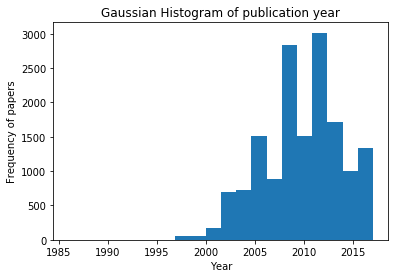

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# gaussian_numbers = np.random.normal(size=10000)
plt.hist(vec_year, bins=20)
plt.title("Gaussian Histogram of publication year")
plt.xlabel("Year")
plt.ylabel("Frequency of papers")
# plt.show()
plt.savefig('publication_year.pdf'  ,  bbox_inches='tight')